In [2]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/exue001c/Desktop/evagit/DSpractice/DataScience_NG_PS/conversion_data.csv')
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [4]:
for col in df.columns:
    unique=sorted(df[col].unique())
    print '{0:20s} {1:5d}\t'.format(col, len(unique)), unique[:5]

country                  4	['China', 'Germany', 'UK', 'US']
age                     60	[17, 18, 19, 20, 21]
new_user                 2	[0, 1]
source                   3	['Ads', 'Direct', 'Seo']
total_pages_visited     29	[1, 2, 3, 4, 5]
converted                2	[0, 1]


In [42]:
df[df['age']>90]
df = df[df['age']<100]

In [5]:
def metric_slice_visual( dim, metric):
    grouped = df[[dim,metric]].groupby(dim).mean().reset_index()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    sns.countplot(x=dim, hue=metric, data=df, ax=ax[0])
    ax[0].set_yscale('log')
    ax[0].set_title('Count by '+ dim)
    sns.barplot(x=dim, y=metric, data=df, ax=ax[1])
    ax[1].set_title('Average '+metric+' Rate')
    
    print grouped

   country  converted
0    China   0.001332
1  Germany   0.062500
2       UK   0.052632
3       US   0.037801
   new_user  converted
0         0   0.072002
1         1   0.014021
   source  converted
0     Ads   0.034483
1  Direct   0.028169
2     Seo   0.032895


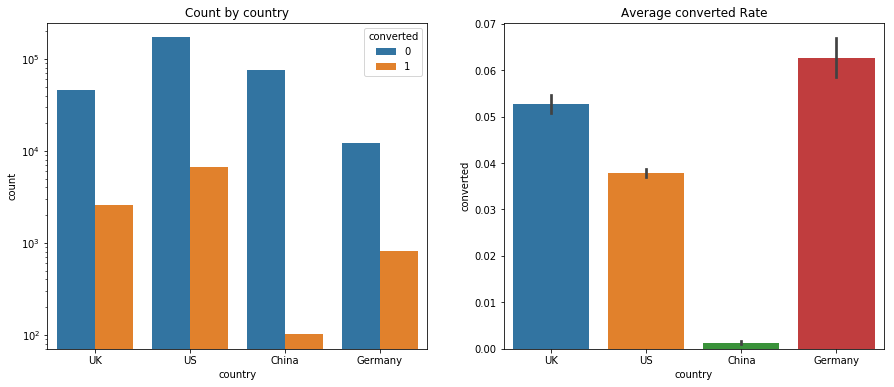

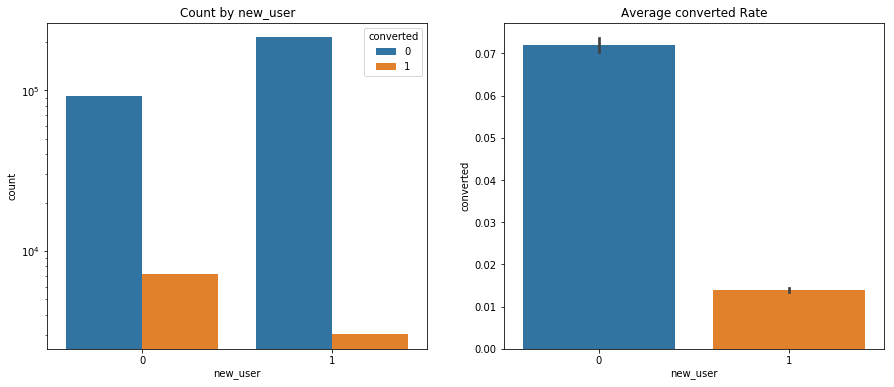

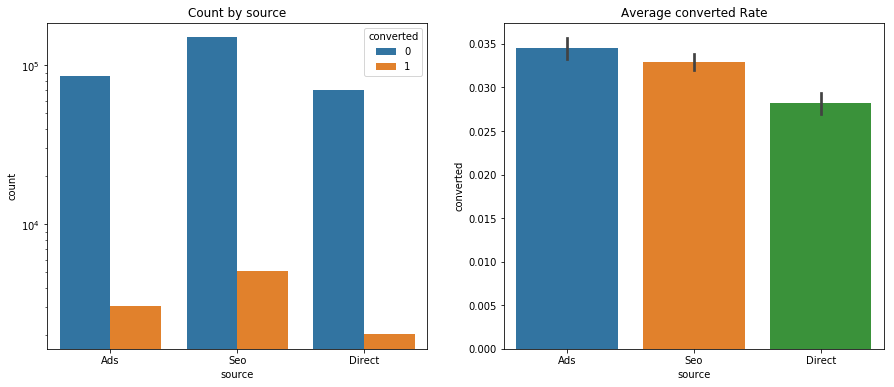

In [6]:
metric_slice_visual('country','converted')
metric_slice_visual('new_user','converted')
metric_slice_visual('source','converted')

In [45]:
grouped = df[['country','converted']].groupby('country').mean().reset_index()
grouped

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


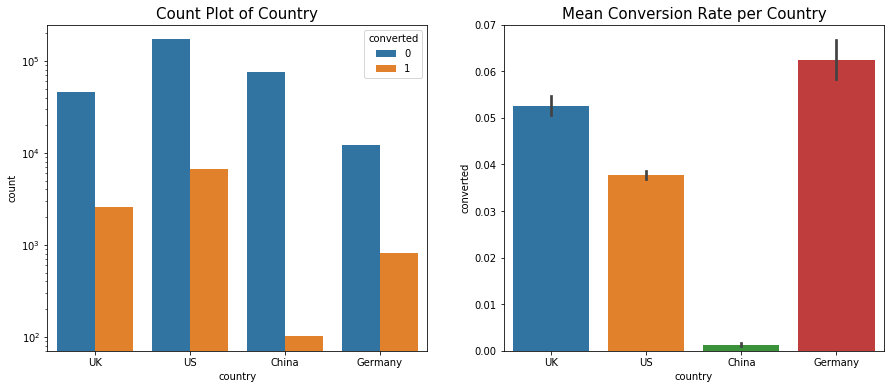

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Count Plot of Country', fontsize=15)
sns.barplot(x='country', y='converted', data=df, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=15)

In [7]:
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_25"; Java(TM) SE Runtime Environment (build 1.8.0_25-b17); Java HotSpot(TM) 64-Bit Server VM (build 25.25-b02, mixed mode)
  Starting server from /Users/exue001c/miniconda2/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/hv/dn8j7kgn45j6przfl_lb9s343dpn24/T/tmpMmIF12
  JVM stdout: /var/folders/hv/dn8j7kgn45j6przfl_lb9s343dpn24/T/tmpMmIF12/h2o_exue001c_started_from_python.out
  JVM stderr: /var/folders/hv/dn8j7kgn45j6przfl_lb9s343dpn24/T/tmpMmIF12/h2o_exue001c_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,"3 years, 3 months and 12 days !!!"
H2O cluster name:,H2O_from_python_exue001c_bup0dt
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


https://github.com/h2oai/h2o-tutorials/blob/master/h2o-open-tour-2016/chicago/intro-to-h2o.ipynb
